# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name:Roberto Castro Soto

- ID: A01640117

- My carreer: ITC

# Importing libraries

In [38]:

import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits


# PART 1
# Use your assigned dataset

## A1 Load data

In [20]:
url = '/content/A01640117.csv'
data = pd.read_csv(url)
data


,Unnamed: 0,x1,x2
0,0,-1.061849,-0.053072
1,1,0.549019,0.899321
2,2,-0.702806,0.716421
3,3,0.917401,-0.444477
4,4,0.273282,0.414502
...,...,...,...
2043,2043,0.332964,0.927118
2044,2044,0.322304,0.894280
2045,2045,-0.002732,1.042157
2046,2046,-0.968300,0.194479


## A2 Data managment


Print the first 7 rows

In [3]:
print(data.head(7))

   Unnamed: 0        x1        x2
0           0 -1.061849 -0.053072
1           1  0.549019  0.899321
2           2 -0.702806  0.716421
3           3  0.917401 -0.444477
4           4  0.273282  0.414502
5           5  0.015683  0.515778
6           6 -0.653093  0.063681


Print the first 4 last rows

In [4]:
print(data.tail(4))

      Unnamed: 0        x1        x2
2044        2044  0.322304  0.894280
2045        2045 -0.002732  1.042157
2046        2046 -0.968300  0.194479
2047        2047  0.433687 -0.351761


How many rows and columns are in your data?

Use the `shape` method


In [5]:
print(data.shape)

(2048, 3)


Print the name of all columns 

Use the `columns` method

In [6]:
print(data.columns)

Index(['Unnamed: 0', 'x1', 'x2'], dtype='object')


What is the data type in each column

Use the `dtypes` method 

In [7]:
print(data.dtypes)

Unnamed: 0      int64
x1            float64
x2            float64
dtype: object


What is the meaning of rows and columns?

In [ ]:
# Your responses here

# 1) The id for each value

# 2) the dimension of the table and values of x1

# 3) the dimension of the table and values of x2

#...

Print a statistical summary of your columns


In [8]:
print(data.describe())

        Unnamed: 0           x1           x2
count  2048.000000  2048.000000  2048.000000
mean   1023.500000    -0.001325    -0.001493
std     591.350996     0.588299     0.584815
min       0.000000    -1.222579    -1.205821
25%     511.750000    -0.498450    -0.505049
50%    1023.500000    -0.002210    -0.004554
75%    1535.250000     0.498524     0.496592
max    2047.000000     1.202058     1.211708


In [9]:
# 1) What is the minumum and maximum values of each variable
print(data.describe().loc[['min','max']])
# 2) What is the mean and standar deviation of each variable
print(data.describe().loc[['mean','std']])
# 3) What the 25%, 50% and 75% represent?
#They represent the quartiles of each varible, they divide the data in 4 equal parts, they are used to understand the data distrubution




     Unnamed: 0        x1        x2
min         0.0 -1.222579 -1.205821
max      2047.0  1.202058  1.211708
       Unnamed: 0        x1        x2
mean  1023.500000 -0.001325 -0.001493
std    591.350996  0.588299  0.584815


Rename the columns using the same name with capital letters

In [10]:
new_columns = {}
for col in data.columns:
    new_columns[col] = col.upper()
data = data.rename(columns=new_columns)
print(data.columns)

Index(['UNNAMED: 0', 'X1', 'X2'], dtype='object')


Rename the columns to their original names

In [11]:
for col in data.columns:
    new_columns[col] = col.lower()
data = data.rename(columns=new_columns)
print(data.columns)

Index(['unnamed: 0', 'x1', 'x2'], dtype='object')


Use two different alternatives to get one of the columns

In [12]:
x1 = data['x1']
print(x1)

0      -1.061849
1       0.549019
2      -0.702806
3       0.917401
4       0.273282
          ...   
2043    0.332964
2044    0.322304
2045   -0.002732
2046   -0.968300
2047    0.433687
Name: x1, Length: 2048, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [13]:
x2 = data.loc[:, 'x2']
print(x2)

0      -0.053072
1       0.899321
2       0.716421
3      -0.444477
4       0.414502
          ...   
2043    0.927118
2044    0.894280
2045    1.042157
2046    0.194479
2047   -0.351761
Name: x2, Length: 2048, dtype: float64


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [14]:
x1null = data['x1'].isnull().sum()
x1not_null = data['x1'].notnull().sum()
x2null = data['x2'].isnull().sum()
x2not_null = data['x2'].notnull().sum()
assert x1null + x1not_null == len(data)
assert x2null + x2not_null == len(data)

Discard the first column


In [22]:
data = data.drop(data.columns[0], axis=1)

data

,x1,x2
0,-1.061849,-0.053072
1,0.549019,0.899321
2,-0.702806,0.716421
3,0.917401,-0.444477
4,0.273282,0.414502
...,...,...
2043,0.332964,0.927118
2044,0.322304,0.894280
2045,-0.002732,1.042157
2046,-0.968300,0.194479


### Questions 

Based on the previous results, provide a description of yout dataset

Your response: Real numbers for plotting a figure




## A3 Data visualization

Plot in the same figure the histogram of the two variables

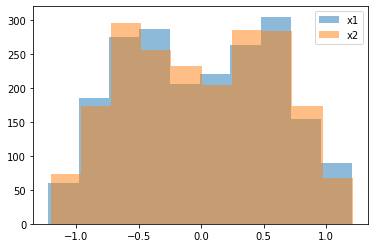

In [23]:
fig, ax = plt.subplots()
ax.hist(data['x1'], alpha=0.5, label='x1')
ax.hist(data['x2'], alpha=0.5, label='x2')
ax.legend(loc='upper right')
plt.show()


Based on this plots, provide a description of your data:

Your response here:The information en each variable it's really similar, as we can see in the plot, the figure will be close

Plot in the same figure the boxplot of the two variables 

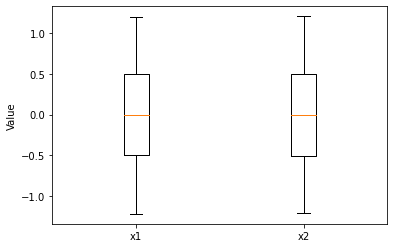

In [24]:
fig, ax = plt.subplots()
ax.boxplot([data['x1'], data['x2']])
ax.set_xticklabels(['x1', 'x2'])
ax.set_ylabel('Value')
plt.show()

Scatter plot of the two variables

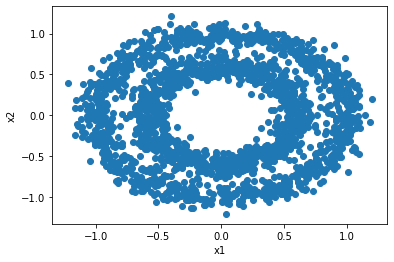

In [25]:
fig, ax = plt.subplots()
ax.scatter(data['x1'], data['x2'])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

### Questions 

Based on the previos plots, provide a description of yout dataset

Your response: As mention before, we have got a circle, a close figure, in the real numbers, that's why the box plot is really similar 




## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


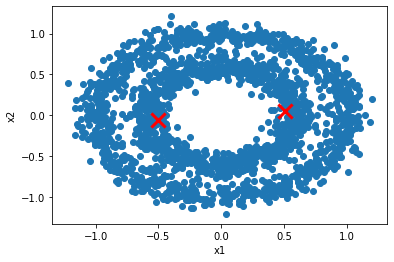

In [27]:
fig, ax = plt.subplots()
ax.scatter(data['x1'], data['x2'])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
kmeans = KMeans(n_clusters=2)
kmeans.fit(data[['x1', 'x2']])
labels = kmeans.predict(data[['x1', 'x2']])
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')

plt.show()

Add to your dataset a column with the assihned cluster to each data point

In [29]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data[['x1', 'x2']])

data['Cluster'] = kmeans.predict(data[['x1', 'x2']])

print(data.head())

         x1        x2  Cluster
0 -1.061849 -0.053072        1
1  0.549019  0.899321        1
2 -0.702806  0.716421        1
3  0.917401 -0.444477        0
4  0.273282  0.414502        1


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Print the number associated to each cluster

In [30]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data[['x1', 'x2']])

# Add a column with the assigned cluster to each data point
data['Cluster'] = kmeans.predict(data[['x1', 'x2']])

# Print the number of data points in each cluster
print(data['Cluster'].value_counts())

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    1026
0    1022
Name: Cluster, dtype: int64


Print the centroids

In [32]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data[['x1', 'x2']])
print(kmeans.cluster_centers_)


[[ 0.46401977 -0.20764175]
 [-0.47215573  0.20708494]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Print the intertia metric

In [33]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data[['x1', 'x2']])
print(kmeans.inertia_)

869.448808598288


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

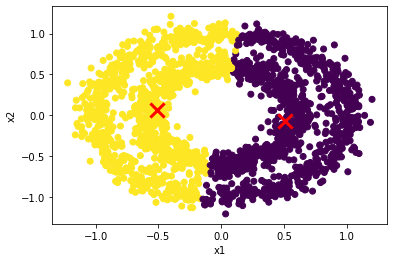

In [34]:
plt.scatter(data['x1'], data['x2'], c=data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Questions 

Provides a detailed description of your results

Your response:Podemos observar como la figura se complementa y se cierra formando un circulo-ovalo

## A5 Elbow plot

Compute the Elbow plot

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

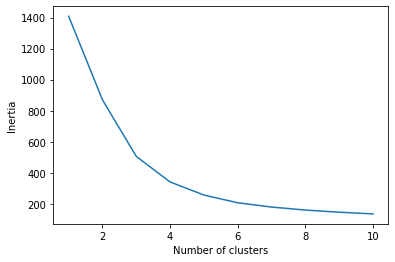

In [36]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[['x1', 'x2']])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Questions 

What is the best number of clusters K? (argue your response)

Your response: entre 6 a 10, que es la parte que menos cambia dentro de la gráfica


Does this number of clusters agree with your inital guess? (argue your response)

Your response: no, no tenía la suficiente información para saber



# PART 2
# Load and do clustering using the "digits" dataset

1) Load the dataset using the "load_digits()" function from "sklearn.datasets"


In [44]:
digits = load_digits()
dfdig = pd.DataFrame(np.column_stack([digits['data'], digits['target']]), columns=digits['feature_names'] + ['target'])
dfdig

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


2) Plot some of the observations

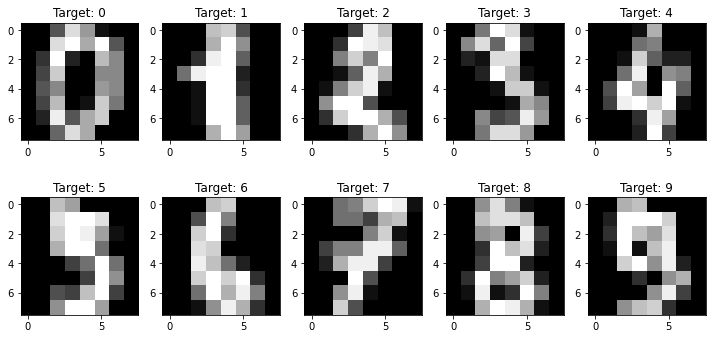

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), digits.images, digits.target):
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Target: {label}')
plt.tight_layout()
plt.show()

3) Do K means clustering 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


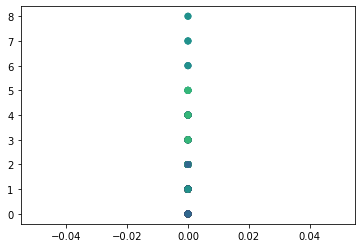

In [49]:
kmeans = KMeans(n_clusters=7, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(digits.data)

# Get the predicted labels and cluster centers
labels = kmeans.predict(digits.data)
centers = kmeans.cluster_centers_
plt.scatter(digits.data[:, 0], digits.data[:, 1], c=labels, cmap='viridis')
plt.show()

4) Verify your results in any of the observations

In [50]:
# Select a few random indices
indices = np.random.choice(digits.data.shape[0], 5)

# Print the actual digit labels and the predicted cluster labels for the selected observations
for i in indices:
    print(f"Actual label: {digits.target[i]}, Predicted label: {labels[i]}")


Actual label: 9, Predicted label: 5
Actual label: 2, Predicted label: 4
Actual label: 7, Predicted label: 3
Actual label: 1, Predicted label: 0
Actual label: 7, Predicted label: 3


### Questions 

Provides a detailed description of your results.

Your response: Podemos observar como la predicción no conicide con la imagen actual

# PART 3
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:
la importancia del analisis de datos, se utliza en casi todas las ramas profesionales, nos ayudan a hacer hipotesis y tomar decisiones. Dentro de la semana tec retomé de nuevo python, volví a recordar lo que ya conocía pero aprendí un poco más de tomar decisiones, como ver lo datos y saber analizarlos, cosa que no se aprenden en una semana, pero sí nos ayudan a daber más.